In [ ]:
# Computational_Python 2020
#Name: Roberto Heredia Fonseca

In [ ]:
# Reading and plotting demand 2018

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


#change cm to inch for figure size

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

#Change font siz
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize= 6)            # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [85]:
#reading de excel file
#pass a dictionary with columns of day and time since there are three days missing in the data. Or it is possible to create a date_range with a space of freq of 30T (30min)

df=pd.read_excel('Informacion Demanda horaria 2018.xlsx', parse_dates={'date':['Fecha', 'Hora']})
#df.head(5)

df.rename(columns ={'Hidraulica [MW]': 'Hydropower', 'Renovable [MW]': 'Non-hydro res', 'Termica [MW]': 'Thermal'}, inplace=True) 
#df.info()

In [141]:
df['day'] = df['date'].dt.weekday_name

df['month'] = df['date'].dt.month_name()

df['time'] = df['date'].dt.time
df.head(5)

date  #  Hydropower  Non-hydro res  Thermal  \
0 2018-01-01 00:00:00  1     2011.17          18.59   361.62   
1 2018-01-01 00:30:00  2     2151.52          12.44   359.02   
2 2018-01-01 01:00:00  3     2107.46          16.00   352.73   
3 2018-01-01 01:30:00  4     2048.40          15.63   351.77   
4 2018-01-01 02:00:00  5     1993.43          16.67   347.77   

   Importacion [MW]  Total [MW]     day    month      time  
0               0.0     2391.38  Monday  January  00:00:00  
1               0.0     2522.98  Monday  January  00:30:00  
2               0.0     2476.19  Monday  January  01:00:00  
3               0.0     2415.80  Monday  January  01:30:00  
4               0.0     2357.87  Monday  January  02:00:00

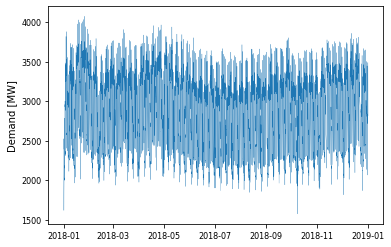

In [120]:
plt.plot('date', 'Total [MW]', data=df, linestyle='solid', linewidth=.25)
plt.ylabel('Demand [MW]')
plt.savefig('Demand_total.png', dpi=300, bbox_inches='tight', figsize=cm2inch((7.5, 10)))
plt.show()

#Plot demand by three main tech

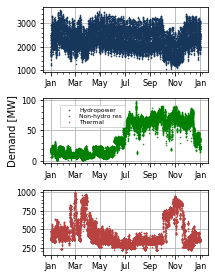

In [121]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=cm2inch((7.5, 10)))
#fig.suptitle("Energy demand 2018")

ax1.plot('date','Hydropower', data=df, linestyle='none',marker='.',markersize=1, color='#16365C')
ax1.grid(b=bool)
ax1.minorticks_on()

ax2.plot('date','Non-hydro res', data=df, linestyle='none',marker='.',markersize=1, color="green")
ax2.grid(b=bool)
ax2.minorticks_on()

ax3.plot('date','Thermal', data=df, linestyle='none',marker='.',markersize=1, color='#B7423F')
ax3.grid(b=bool)
ax3.minorticks_on()

ax2.set_ylabel("Demand [MW]")

# Define the date format
myFmt = mdates.DateFormatter('%b')
ax1.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_formatter(myFmt)
ax3.xaxis.set_major_formatter(myFmt)

#adjust distance between subplots
plt.subplots_adjust(top=1, hspace=0.4)

#legend
plt.figlegend(loc='upper right', bbox_to_anchor=(0.6, 0.62))
plt.rcParams.update({'legend.labelspacing':0.15})

plt.savefig('Ec demand 2018.png',dpi=300, bbox_inches='tight')
#plt.show()

#Plot demand by threee timestamps

In [190]:
# possible to use resample or groupby
# resample() groups rows by some time or date information,
# .groupby() groups rows based on the values in one or more columns.

monthly = pd.DataFrame(df.resample('M', on='date')['Total [MW]'].mean())
x = monthly.index
y = monthly['Total [MW]'] 

hour = pd.DataFrame(df.groupby(df['date'].dt.hour)['Total [MW]'].mean())
x1 = hour.index
y1 = hour['Total [MW]'] 

day = pd.DataFrame(df.groupby(df['date'].dt.weekday)['Total [MW]'].mean())
#he day of the week with Monday=0, Sunday=6.
x2 = day.index
y2 = day['Total [MW]'] 

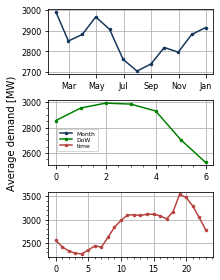

In [191]:
fig_ts,(ax1_m, ax2_d, ax3_h) = plt.subplots(nrows=3, figsize= cm2inch((7.5,10)))
#fig_ts.suptitle("Average energy demand 2018")

ax1_m.plot(x,y, linestyle='solid',marker='.',markersize=5, color='#16365C')
ax1_m.grid(b=bool)
#ax1_m.minorticks_on()

ax1_m.xaxis_date()
myFmt = mdates.DateFormatter('%b')
ax1_m.xaxis.set_major_formatter(myFmt)

ax2_d.plot(x2,y2, linestyle='solid',marker='.',markersize=5, color="green")
ax2_d.grid(b=bool)
ax2_d.minorticks_on()

ax3_h.plot(x1,y1, linestyle='solid',marker='.',markersize=5, color='#B7423F')
ax3_h.grid(b=bool)
ax3_h.minorticks_on()

ax2_d.set_ylabel("Average demand [MW)")


#adjust distance between subplots
plt.subplots_adjust(top=1, hspace=0.4)

#legend
fig_ts.legend([ax1_m, ax2_d, ax3_h],
           labels= ["Month", "DoW", "time"],      # The line objects
           borderaxespad=0.1,                    # Small spacing around legend box
           loc=(0.26, 0.46)
           )
#plt.savefig('ts.pdf',dpi=300)
plt.savefig('ts.png',dpi=400,  bbox_inches='tight')
plt.show()

#Joinning all data frames by columns

In [11]:
df_h = df[['date','Hydropower', 'day', 'time', 'month']].rename(columns={'Hydropower':'Demand'})
df_h['Tech']= 'Hydropower'
#df_h

df_t = df[['date','Thermal', 'day', 'time','month']].rename(columns={'Thermal':'Demand'})
df_t['Tech']= 'Thermal'
#df_t

df_n = df[['date','Non-hydro res', 'day', 'time','month']].rename(columns={'Non-hydro res':'Demand'})
df_n['Tech']= 'Non-hydro res'
#df_n

In [12]:
df1 = pd.concat([df_h, df_t,df_n], axis=0, ignore_index='True')
df1.head(5)

date   Demand     day      time  month        Tech
0 2018-01-01 00:00:00  2011.17  Monday  00:00:00      1  Hydropower
1 2018-01-01 00:30:00  2151.52  Monday  00:30:00      1  Hydropower
2 2018-01-01 01:00:00  2107.46  Monday  01:00:00      1  Hydropower
3 2018-01-01 01:30:00  2048.40  Monday  01:30:00      1  Hydropower
4 2018-01-01 02:00:00  1993.43  Monday  02:00:00      1  Hydropower

In [13]:
#change x to day, month or time
f2 =px.box(df1, x="day", y='Demand', facet_row='Tech', color='Tech')
f2.update_yaxes(matches=None)
f2.update_layout()
f2.show()
#f2.write_html("rh_demand_day.html")

# Reading data (more than 300K data points)
# Capacity factors (cf) calculation


In [14]:
# Read generation by year
# change the year #
df = pd.read_excel('EC generation 2018.xlsx',sheet_name='rpConsolidadoEnergiaProducida',skiprows=0,skipfooter=0,usecols='A,G,M,N')

# Read the list of power plants and capacity [MW]
df_pp = pd.read_excel('Power plants.xlsx') 
df_pp = df_pp.to_numpy()

#data frame for capacity factors
df_cf = pd.DataFrame(np.zeros((0,0)))
data = np.zeros((12,1))

# array 'days' contains every month and #days
days = np.array([['Ene',31],['Feb',28], ['Mar',31],['Abr',30],['May',31],['Jun',30],['Jul',31],['Ago',31],['Sep',30],['Oct',31],['Nov',30],['Dic',31]])

In [15]:
# defining a function that first filter by power plant, system
# then, it will calculate the capacity factor by each month of the year
def c_f(power_plant,capacity):
    df1 = df.loc[(df['Central'] == power_plant) & (df['Sistema'] == 'S.N.I')].drop(columns=['Sistema'])
    for i in range(1, len(days)):
        data[i-1,0] = df1.loc[df['Mes'] == days[i-1,0]].sum(axis = 0, skipna = True)[2]  # finding sum over 
   
    #converting the array to a data frame
    a = pd.DataFrame(data)
    a = a.rename(columns={0:"Me"}) # Me montly energy

    # Declare a list that is to be converted into a column 
    d = [31,28,31,30,31,30,31,31,30,31,30,31] 
    a['d'] = d 

    ###calculating the cf
    a[power_plant] = (a['Me']/(a['d']*capacity*24)).round(3)

    ###Asigning the cf to cf matrix
    df_cf[power_plant] = a[power_plant]

In [16]:
# for loop to read every hydropower plant and its capacity from df_pp 
for i in range(1,len(df_pp)):
    pp = df_pp[i-1,0]
    cp = df_pp[i-1,1]
    c_f(pp,cp)

df_cf.head(5)

Carcelén  Recuperadora  Noroccidente  Victoria  Sibimbe  Hidrotambo  \
0       0.0         0.760         0.819     0.481    0.545       0.407   
1       0.0         0.000         0.701     0.249    0.563       0.882   
2       0.0         0.000         0.909     0.443    0.901       0.950   
3       0.0         0.000         0.940     0.506    0.886       0.982   
4       0.0         0.376         0.888     0.605    0.896       0.967   

   Pusuno  El Carmen  Ipnegal  Otavalo II  ...   Baba  Agoyán  Mazar  \
0     0.0      0.642    0.798       0.852  ...  0.204   0.740  0.488   
1     0.0      0.645    0.915       0.904  ...  0.720   0.611  0.575   
2     0.0      0.667    0.924       0.804  ...  0.683   0.540  0.327   
3     0.0      0.666    0.939       0.795  ...  0.632   0.737  0.350   
4     0.0      0.555    0.839       0.875  ...  0.704   0.593  0.381   

   Delsitanisagua  Marcel Laniado  San Francisco  Minas San Francisco  \
0             0.0           0.360          0.639                  0.0   
1             0.0           0.320          0.559                  0.0   
2             0.0           0.621          0.517                  0.0   
3             0.0           0.541          0.650                  0.0   
4             0.0           0.623          0.504                  0.0   

   Sopladora  Cardenillo  Molino  
0      0.596         0.0   0.545  
1      0.578         0.0   0.526  
2      0.473         0.0   0.385  
3      0.646         0.0   0.518  
4      0.640         0.0   0.574  

[5 rows x 32 columns]

In [17]:
#print csv
df_cf.to_csv('c_factors_2018.csv')

# Results visualization

In [18]:
# read results of the optimization
PbT = pd.read_csv('ProductionByTechnology.csv')
PbT.head(5)
#PbT.info()

r        l        t       f     y  ProductionByTechnology
0  region_1  S10D1B1  DTB_001  FL_BIG  2018                     0.0
1  region_1  S10D1B1  DTB_001  FL_BIG  2019                     0.0
2  region_1  S10D1B1  DTB_001  FL_BIG  2020                     0.0
3  region_1  S10D1B1  DTB_001  FL_BIG  2021                     0.0
4  region_1  S10D1B1  DTB_001  FL_BIG  2022                     0.0

In [19]:
# read the data frame to filter PbT
tech = pd.read_excel('Tech.xlsx')
tech.head(5)

#define the color by tech
t_colors = dict(zip(tech['t_color'].dropna(), tech['hex'].dropna()))

In [20]:
# filtered data frame
PbT_f = PbT[PbT['f'].isin(tech['fuels'].dropna()) & PbT['t'].isin(tech['t']) & PbT['ProductionByTechnology']>0]
PbT_f = PbT_f.reset_index(drop=True)
PbT_f.head(5)

r        l           t           f     y  ProductionByTechnology
0  region_1  S10D1B1  PP_BIO_001  FL_ELC_001  2018                0.027100
1  region_1  S10D1B1  PP_GEO_001  FL_ELC_001  2026                0.041045
2  region_1  S10D1B1  PP_GEO_001  FL_ELC_001  2027                0.072391
3  region_1  S10D1B1  PP_GEO_001  FL_ELC_001  2028                0.072391
4  region_1  S10D1B1  PP_GEO_001  FL_ELC_001  2029                0.072391

In [21]:
# function to changes the code names of the generation technologies to easy names
def tech_names(x):
    t = x['t'].to_numpy()
    tech_t = tech['t'].to_numpy()
    tech_t_n = tech['t_names'].to_numpy()

    l = len(x)
    l_n = len(tech_t)

    for j in range(0,l):
        for i in range(0,l_n):
            if t[j] == tech_t[i]:
                t[j] = tech_t_n[i]
    
    x = x.append(pd.DataFrame(t, columns=['t'])) 

In [22]:
# calling the function to change names in a data frame.
tech_names(PbT_f)
PbT_f.head(5)

r        l           t           f     y  ProductionByTechnology
0  region_1  S10D1B1     Biomass  FL_ELC_001  2018                0.027100
1  region_1  S10D1B1  Geothermal  FL_ELC_001  2026                0.041045
2  region_1  S10D1B1  Geothermal  FL_ELC_001  2027                0.072391
3  region_1  S10D1B1  Geothermal  FL_ELC_001  2028                0.072391
4  region_1  S10D1B1  Geothermal  FL_ELC_001  2029                0.072391

In [23]:
#groupby technology and year
#This is a important step to use plotly otherwise it will plot every single bar

PbT_f = PbT_f.groupby(['t', 'y'])['ProductionByTechnology'].sum().reset_index()
PbT_f.head(5)

t     y  ProductionByTechnology
0  Biomass  2018                0.561003
1  Biomass  2019                0.543980
2  Biomass  2020                0.604706
3  Biomass  2021                0.553776
4  Biomass  2022                0.553776

In [24]:
fig_PbT = px.bar(PbT_f, x='y', y='ProductionByTechnology', color='t', barmode='relative',
opacity=1, color_discrete_map=t_colors)

fig_PbT.update_layout(title_text="Generation by Technology",
 xaxis=dict(title_text='year'),
 yaxis=dict(title_text='Generation [PJ]'),
 plot_bgcolor='rgb(255,255,255)',
 font_size=10) 

#fig_PbT.write_image('Generation_be_tech.jpg', width= 600, height= 600)

fig_PbT.show()
#fig_PbT.write_html("ProductionByTech.html")